In [5]:
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from scipy.stats import multivariate_normal
import numpy as np
%matplotlib inline
xlsx_file = pd.ExcelFile('./Assignment/DataSet/university data.xlsx')
df = xlsx_file.parse("university_data")
#Drop row number 51 in the excel sheet(or 49 in this case because Row 0 has the headers)
df = df.iloc[0:49,:]
df.head()

,rank,name,CS Score (USNews),Research Overhead %,Admin Base Pay$,Tuition(out-state)$,Grad Student No.,TT Faculty,Lecturers,G-TT Ratio,G-TTL Ratio
0,1.0,University of California—​Berkeley,5.0,57.0,400400.0,25064.0,n,NaN,NaN,NaN,NaN
1,5.0,University of Illinois—​Urbana-​Champaign,4.6,58.6,512500.0,30228.0,n,59.0,NaN,NaN,NaN
2,6.0,University of Washington,4.5,54.5,550000.0,33513.0,214,59.0,NaN,NaN,NaN
3,9.0,Georgia Institute of Technology,4.3,55.9,440000.0,30698.0,n,37.0,NaN,NaN,NaN
4,9.0,University of Texas—​Austin,4.3,55.0,628190.0,34722.0,176,42.0,NaN,NaN,NaN


In [6]:
#Create a new data frame with just the first 4 columns
df2 = df.iloc[:,2:6]
labels = df.iloc[:,0]


#Mean 
means = [df2["CS Score (USNews)"].mean(), df2["Research Overhead %"].mean(), 
         df2["Admin Base Pay$"].mean(), df2["Tuition(out-state)$"].mean()]
stds = [df2["CS Score (USNews)"].std(), df2["Research Overhead %"].std(), 
         df2["Admin Base Pay$"].std(), df2["Tuition(out-state)$"].std()]
variances = [i*i for i in stds]


df2.head()


,CS Score (USNews),Research Overhead %,Admin Base Pay$,Tuition(out-state)$
0,5.0,57.0,400400.0,25064.0
1,4.6,58.6,512500.0,30228.0
2,4.5,54.5,550000.0,33513.0
3,4.3,55.9,440000.0,30698.0
4,4.3,55.0,628190.0,34722.0


In [7]:
#df3 = (df2 - df2.mean()) / df2.std()
df3 = df2

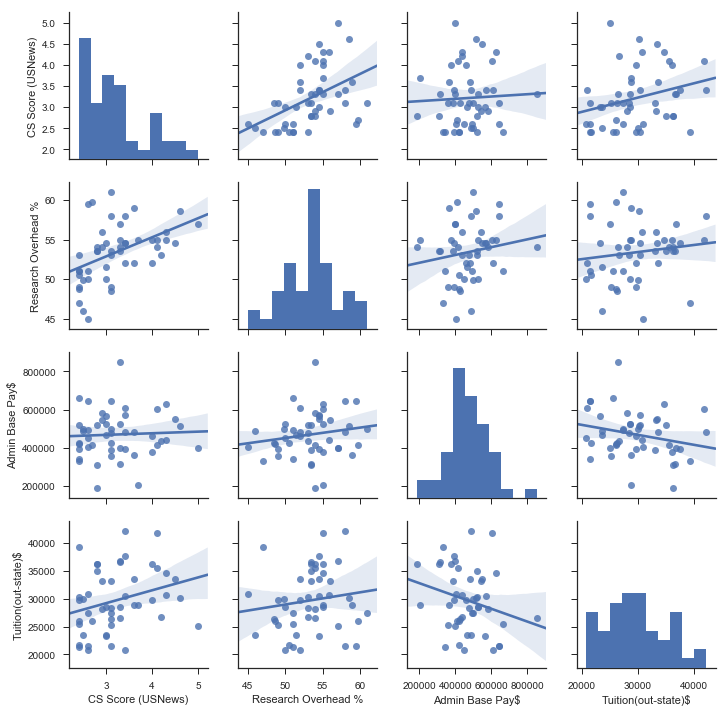

In [8]:
#Create another variable called Rank Category
#bins = [0 ,10, 20, 30, 40, 50, 60, 70]
#df['categories'] = pd.cut(df['rank'], bins,labels = bins[1:])
#df.head()
#df3["categories"] = df["categories"]
#df3 = (df2 - df2.mean())/df2.std()


sns.pairplot(df3,kind = 'reg', palette='husl');


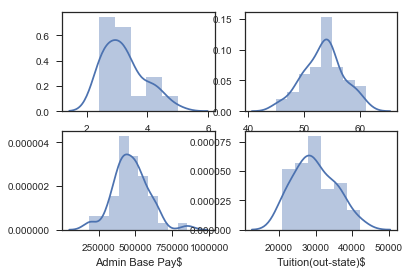

In [9]:
#Let's explore the data
df2.head()
#sns.barplot(df["name"], df["CS Score (USNews)"])
fig, axs = plt.subplots(nrows = 2, ncols=2)
plt.rcParams['figure.figsize']=(10,10)
sns.distplot(df2["CS Score (USNews)"],ax=axs[0][0])
sns.distplot(df2["Research Overhead %"],ax=axs[0][1])
sns.distplot(df2["Admin Base Pay$"],ax=axs[1][0])
sns.distplot(df2["Tuition(out-state)$"],ax=axs[1][1])

In [41]:
#corr_mat = np.corrcoef(df2[["CS Score (USNews)","Research Overhead %", "Admin Base Pay$", "Tuition(out-state)$"]])
cov_mat = np.array(df3.cov())
print cov_mat
corr_mat = np.array(df3.corr())
print corr_mat
np.linalg.det(corr_mat)

[[  4.57500000e-01   1.10562500e+00   3.87978185e+03   1.05847976e+03]
 [  1.10562500e+00   1.28504167e+01   7.02793765e+04   2.80578899e+03]
 [  3.87978185e+03   7.02793765e+04   1.41897208e+10  -1.63685641e+08]
 [  1.05847976e+03   2.80578899e+03  -1.63685641e+08   3.13676958e+07]]
[[ 1.          0.4559883   0.04815316  0.27941242]
 [ 0.4559883   1.          0.16458201  0.13975105]
 [ 0.04815316  0.16458201  1.         -0.2453479 ]
 [ 0.27941242  0.13975105 -0.2453479   1.        ]]


0.6556741723569447

In [63]:
#Calculate the individual pdfs for each value. So we should get 49 x 4 values.
df3 = df2
means = [df3["CS Score (USNews)"].mean(), df3["Research Overhead %"].mean(),
         df3["Admin Base Pay$"].mean(),df3["Tuition(out-state)$"].mean()]

stds = [ df3["CS Score (USNews)"].std(),df3["Research Overhead %"].std(),
       df3["Admin Base Pay$"].std() ,df3["Tuition(out-state)$"].std()]

pdfs = [norm.pdf(df3["CS Score (USNews)"],df3["CS Score (USNews)"].mean() , df3["CS Score (USNews)"].std()),
        norm.pdf(df3["Research Overhead %"], df3["Research Overhead %"].mean(), df3["Research Overhead %"].std()),
        norm.pdf(df3["Admin Base Pay$"],df3["Admin Base Pay$"].mean(),df3["Admin Base Pay$"].std() ),
        norm.pdf(df3["Tuition(out-state)$"],df3["Tuition(out-state)$"].mean() , df3["Tuition(out-state)$"].std())
        ]

loglikelihood3 = sum([-0.5*np.log(2*math.pi) - 0.5*np.log(df3["CS Score (USNews)"].var()) - 0.5/(2*df3["CS Score (USNews)"].var())*sum(df3["CS Score (USNews)"] - df3["CS Score (USNews)"].mean()),
                  -0.5*np.log(2*math.pi) - 0.5*np.log(df3["Research Overhead %"].var()) - 0.5/(2*df3["Research Overhead %"].var())*sum(df3["Research Overhead %"] - df3["Research Overhead %"].mean()),
                  -0.5*np.log(2*math.pi) - 0.5*np.log(df3["Admin Base Pay$"].var()) - 0.5/(2*df3["Admin Base Pay$"].var())*sum(df3["Admin Base Pay$"] - df3["Admin Base Pay$"].mean()),
                  -0.5*np.log(2*math.pi) - 0.5*np.log(df3["Tuition(out-state)$"].var()) - 0.5/(2*df3["Tuition(out-state)$"].var())*sum(df3["Tuition(out-state)$"] - df3["Tuition(out-state)$"].mean())
                  ])
print loglikelihood3
pdfs = np.array(pdfs).T
print pdfs[1]
print pdfs.shape
loglikelihood = sum(np.log([reduce(lambda x,y: x*y, p) for p in pdfs]))
loglikelihood2 = np.log(reduce(lambda x,y: x*y, [reduce(lambda x,y: x*y, p) for p in pdfs]))

print loglikelihood, loglikelihood2

-24.879989443
[  7.23287897e-02   3.86379101e-02   3.13475325e-06   7.09292343e-05]
(49L, 4L)
-1315.11948271 -inf


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in log


In [68]:
a = sum(multivariate_normal.logpdf(np.array(df3), mean=df3.mean(), cov = cov_mat, allow_singular=True))
#b = multivariate_normal.pdf(np.array(df3), mean=df3.mean(), cov = np.eye(4,4), allow_singular=True)
print a

df3.corr()









-1262.32720016


,CS Score (USNews),Research Overhead %,Admin Base Pay$,Tuition(out-state)$
CS Score (USNews),1.000000,0.455988,0.048153,0.279412
Research Overhead %,0.455988,1.000000,0.164582,0.139751
Admin Base Pay$,0.048153,0.164582,1.000000,-0.245348
Tuition(out-state)$,0.279412,0.139751,-0.245348,1.000000


In [47]:
labels = df.iloc[:,0]
df = df.fillna(df.median())
df["Grad Student No."].str.replace('n', None)
df["Grad Student No."].astype(int)
print(df.head())
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression


x_train, x_test, y_train, y_test = train_test_split(df2, labels)

clf = LinearRegression();
clf.fit(x_train,y_train);
preds = clf.predict(x_test)

a = zip(y_test,preds)
print(a)



TypeError: repl must be a string or callable

In [59]:
np.array(df3)

array([[  5.00000000e+00,   5.70000000e+01,   4.00400000e+05,
          2.50640000e+04],
       [  4.60000000e+00,   5.86000000e+01,   5.12500000e+05,
          3.02280000e+04],
       [  4.50000000e+00,   5.45000000e+01,   5.50000000e+05,
          3.35130000e+04],
       [  4.30000000e+00,   5.59000000e+01,   4.40000000e+05,
          3.06980000e+04],
       [  4.30000000e+00,   5.50000000e+01,   6.28190000e+05,
          3.47220000e+04],
       [  4.20000000e+00,   5.30000000e+01,   4.37000000e+05,
          2.66600000e+04],
       [  4.10000000e+00,   5.40000000e+01,   4.16000000e+05,
          3.55800000e+04],
       [  4.10000000e+00,   5.50000000e+01,   6.03357000e+05,
          4.18110000e+04],
       [  4.00000000e+00,   5.50000000e+01,   3.76827000e+05,
          3.61800000e+04],
       [  4.00000000e+00,   5.20000000e+01,   4.59000000e+05,
          2.97200000e+04],
       [  3.70000000e+00,   5.50000000e+01,   2.02487000e+05,
          2.88040000e+04],
       [  3.60000000e